<img src="kaggle_image.jpg" style="width:1000px; height:500px"/>

# Kaggle Survey Machine Learning and Data Science 2017
https://www.kaggle.com/kaggle/kaggle-survey-2017

### Context
For the first time, Kaggle conducted an industry-wide survey to establish a comprehensive view of the state of data science and machine learning. The survey received over 16,000 responses and we learned a ton about who is working with data, what’s happening at the cutting edge of machine learning across industries, and how new data scientists can best break into the field.

I will perform exploratory analysis then explanatory analysis. 

My questions are as follows:

1. Python or R?
2. What data science tools and methods are going be in the limelight?
3. Where should I learn Data Science?
4. Do I need a 'high-performance' computer to study Data Science?
5. How many hours should I study?
6. What blogs, Podcasts, classes are recommended for DS?
7. How much do data scientists make?
8. Where can I get data from?
9. How do data scientist spend most of their time at work?
10. What job skill is most important?

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import random
%matplotlib inline

# Suppress incorrect usage warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
questions = pd.read_csv('schema.csv')
print("There are", questions.shape[0], "questions")

There are 290 questions


In [4]:
questions.head(10)

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All
5,StudentStatus,Are you currently enrolled as a student at a d...,Non-worker
6,LearningDataScience,Are you currently focused on learning data sci...,Non-worker
7,KaggleMotivationFreeForm,What's your motivation for being a Kaggle user?,Non-switcher
8,CodeWriter,Do you write code to analyze data in your curr...,Worker1
9,CareerSwitcher,Are you actively looking to switch careers to ...,Worker1


In [5]:
# Read multiple choice responses file
mcq = pd.read_csv('multipleChoiceResponses.csv', encoding="ISO-8859-1")

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(mcq.shape[0], "people participated in the multiple choice and answered", mcq.shape[1],"questions")

16716 people participated in the multiple choice and answered 228 questions


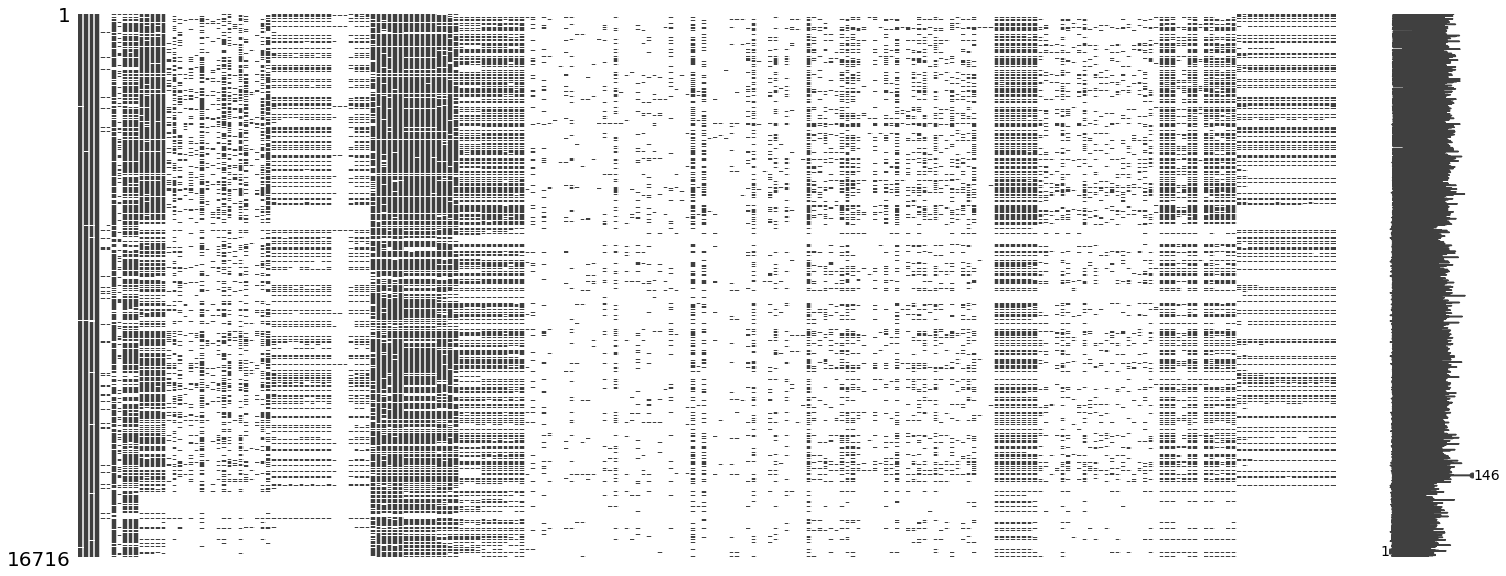

In [9]:
import missingno as msno
msno.matrix(mcq);

* Since there are many NaN, I decided to use missno library to get some insights
* We can observe that there are many columns without responses in the middle. 
* One possible reason is that there are questions only asked for a certain group. 

## Exploratory Analysis

### Gender

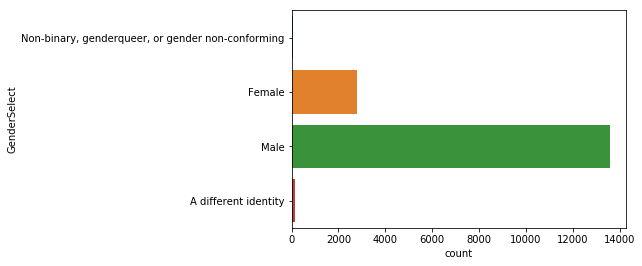

In [10]:
sb.countplot(y='GenderSelect', data=mcq);

mcq.GenderSelect.value_counts()

* The proportion of male is much higher than female and others

### Countries

In [11]:
countries = pd.DataFrame(mcq.Country.value_counts())
countries
countries['Respond'] = countries.index
countries.columns = ['Count', 'Country']
countries = countries.reset_index().drop('index', axis=1)
#countries   # 52+ countries including Other (countries) in the 3rd place
countries.head(20)

,Count,Country
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


### Age

In [12]:
# Average Age
mcq.Age.describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

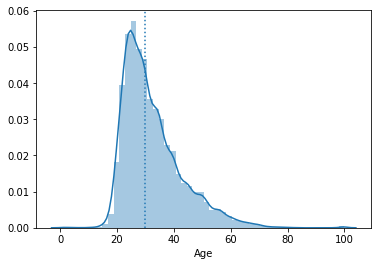

In [13]:
# Using distplot for a univatiate distribution
sb.distplot(mcq[mcq['Age'] > 0]['Age'])
plt.axvline(mcq.Age.median(), linestyle=":");

* Most of survey participants are 20-30 years old
* The average age is 32

### Education

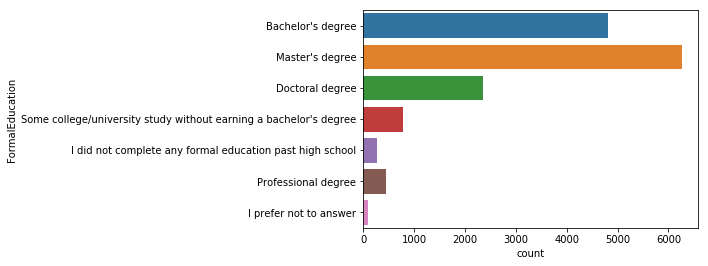

In [14]:
sb.countplot(y='FormalEducation', data=mcq);

* Master's degree holders are more than Bachelor's degree holders 
* Also, there are many participants with Doctoral degree as well

### Major

In [15]:
major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
major_prop = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
major_df = major_count.merge(major_prop, left_index=True, right_index=True)
major_df.columns = ['Count', 'Proportion']
major_df

,Count,Proportion
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


* Computer science is 33% of all participants
* Mathematics or Statistics, engineering, electrical engineering majors in that order 

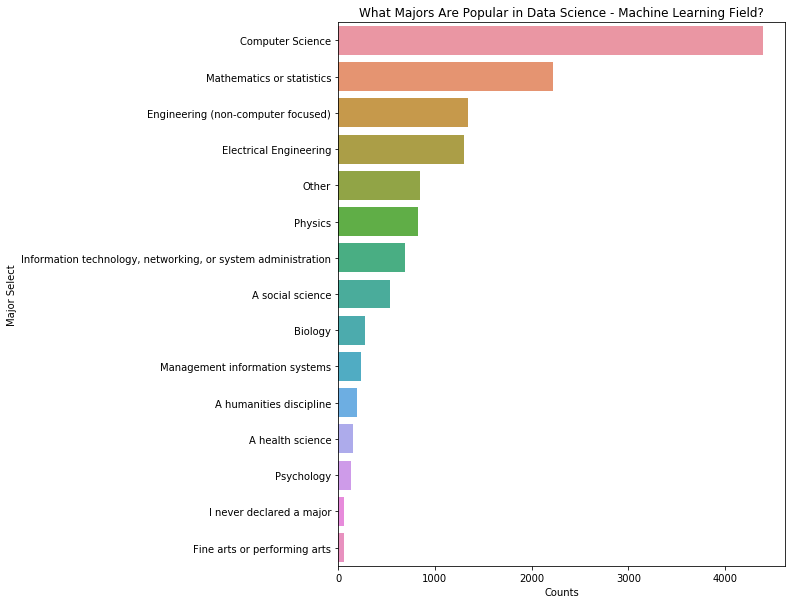

In [16]:
plt.figure(figsize=(8,10))
sb.countplot(y='MajorSelect', data=mcq, order = mcq['MajorSelect'].value_counts().index)
plt.xlabel('Counts')
plt.ylabel('Major Select')
plt.title('What Majors Are Popular in Data Science - Machine Learning Field?');

### Employment Status

In [17]:
es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
es_prop = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
es = es_count.merge(es_prop, left_index=True, right_index=True)
es.columns = ['Count', 'Proportion']
es

,Count,Proportion
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


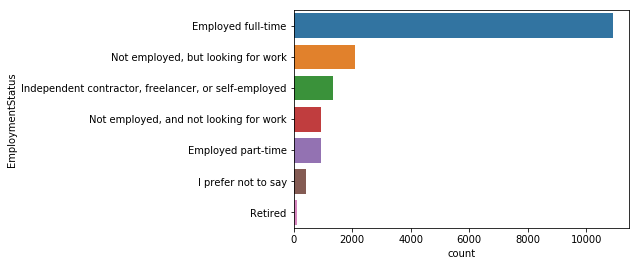

In [18]:
sb.countplot(y='EmploymentStatus', data=mcq, order=mcq['EmploymentStatus'].value_counts().index);

* **65%** of 'Kagglers' are working full-time and **12%** are looking for job

### Programming Experience

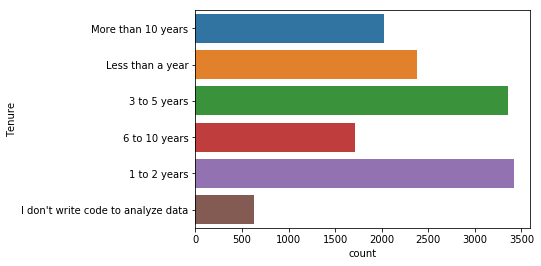

In [19]:
sb.countplot(y='Tenure', data=mcq);

* Most people have 1 to 2 years and 3 to 5 year programming experience

The number of Kagglers(DS-ML) in USA is  4197


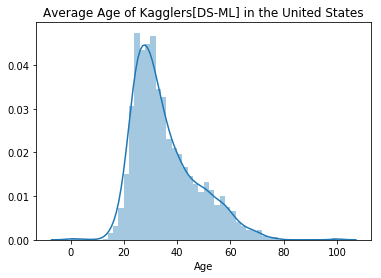

In [20]:
usa = mcq[mcq['Country']=='United States']
sb.distplot(usa.Age.dropna())
print('The number of Kagglers(DS-ML) in USA is ', usa.shape[0])
plt.title('Average Age of Kagglers[DS-ML] in the United States');

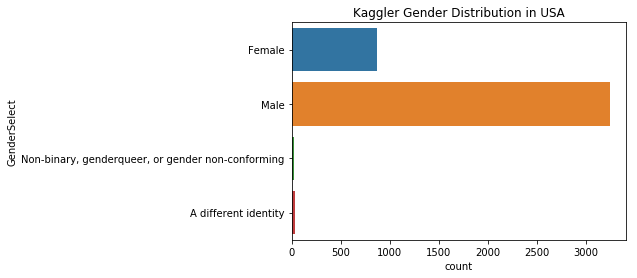

In [21]:
usa_gender_prop = usa.GenderSelect.value_counts(normalize=True)
sb.countplot(y='GenderSelect', data=usa).set_title('Kaggler Gender Distribution in USA');

In [22]:
usa_gender_prop

Male                                                 0.776690
Female                                               0.208264
A different identity                                 0.008837
Non-binary, genderqueer, or gender non-conforming    0.006210
Name: GenderSelect, dtype: float64

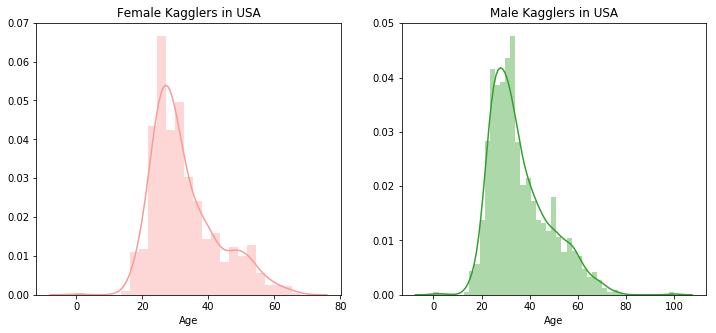

In [23]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sb.distplot(usa['Age'].loc[usa['GenderSelect']=='Female'].dropna(), norm_hist=False, color=sb.color_palette("Paired")[4], ax=ax1).set_title("Female Kagglers in USA")

sb.distplot(usa['Age'].loc[usa['GenderSelect']=='Male'].dropna(), norm_hist=False, color=sb.color_palette("Paired")[3], ax=ax2).set_title("Male Kagglers in USA");

* There are only 800+ female Kagglers in the United States, which means it's hard to generalize. However, a majority of female Kagglers are **24-32** years old while a majority of male Kaagglers are **22-36** years old

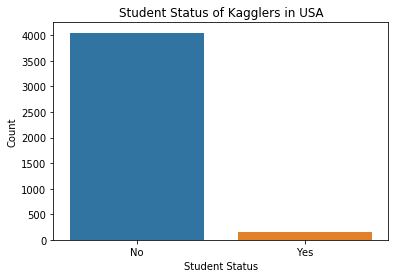

In [24]:
usa['StudentStatus'] = usa['StudentStatus'].fillna('No')
sb.countplot(x='StudentStatus', data=usa)
plt.title('Student Status of Kagglers in USA');
plt.xlabel('Student Status')
plt.ylabel('Count');

## Explnatory Analysis

#### QUESTIONS:
1. Python or R?
2. What data science tools and methods are going be in the limelight?
3. Where should I learn Data Science?
4. Do I need a 'high-performance' computer to study Data Science?
5. How many hours should I study?
6. What blogs, Podcasts, classes are recommended for DS?
6. How much do data scientists make?
7. Where can I get data from? 
8. How do data scientist spend most of their time at work? 
9. What job skill is most important?


### 1. Python or R?


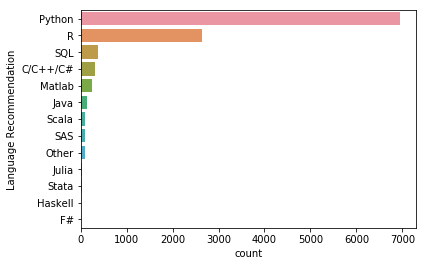

In [25]:
sb.countplot(y='LanguageRecommendationSelect', data=mcq, order=mcq.LanguageRecommendationSelect.value_counts().index)
plt.ylabel('Language Recommendation');

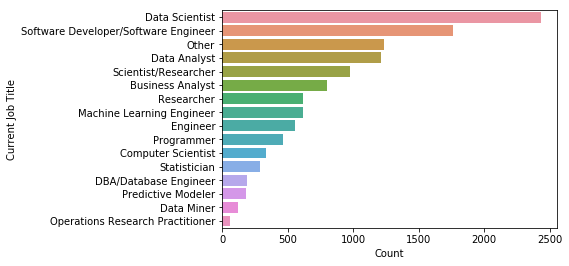

In [26]:
sb.countplot(y=mcq.CurrentJobTitleSelect, order=mcq.CurrentJobTitleSelect.value_counts().index)
plt.xlabel('Count')
plt.ylabel('Current Job Title');

In [ ]:
print(mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape)
py_r = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (mcq['LanguageRecommendationSelect']=='Python') | (mcq['LanguageRecommendationSelect']=='R')]
print(py_r.shape[0])

(11830,)
7737


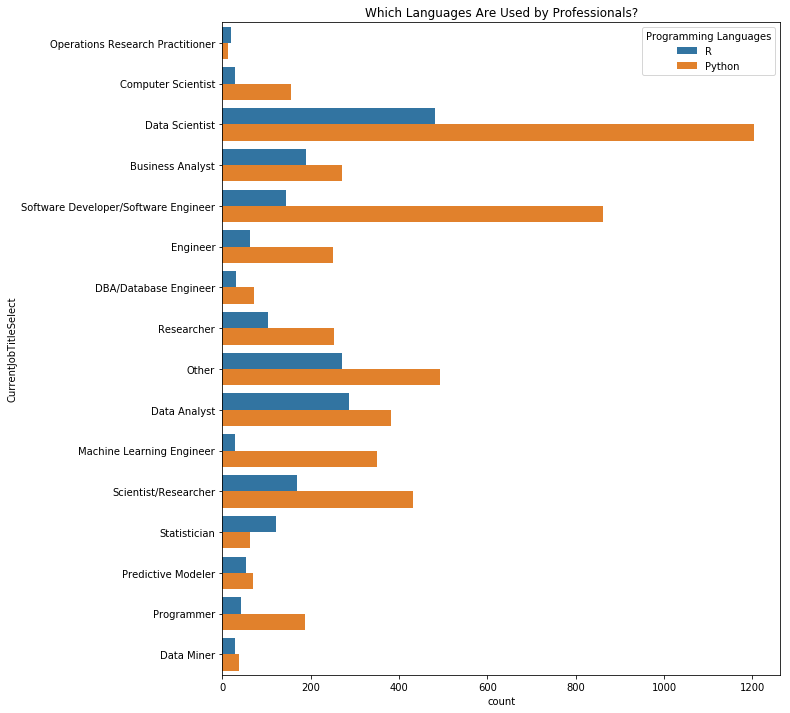

In [ ]:
plt.figure(figsize=(10,12))
sb.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=py_r)
plt.title('Which Languages Are Used by Professionals?')
plt.legend(title="Programming Languages");

### 2. What Data Science Tools and Methods Are Going be in the Limelight?

In [ ]:
ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
ml_tool_proportion = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
ml_tool = ml_tool_count.merge(ml_tool_proportion, left_index=True, right_index=True)
ml_tool.columns = ['Count', 'Proportion']
ml_tool.head(20)

,Count,Proportion
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


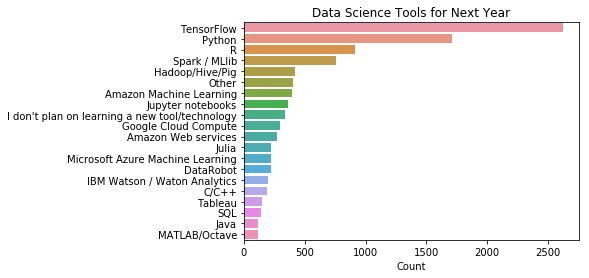

In [ ]:
ml_tool_data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sb.barplot(y=ml_tool_data.index, x=ml_tool_data).set_title("Data Science Tools for Next Year")
plt.xlabel('Count');

* TensorFlow 23%, Python 15%, R 8%
* Clouds: Amazon ML, Google Cloud Computing, MS Azure ML, IMB Watson


In [ ]:
ml_method_count = pd.DataFrame(mcq['MLMethodNextYearSelect'].value_counts())
ml_method_proportion = pd.DataFrame(mcq['MLMethodNextYearSelect'].value_counts(normalize=True))
ml_method = ml_method_count.merge(ml_method_proportion, left_index=True, right_index=True)
ml_method.columns = ['Count', 'Proportion']
ml_method.head(20)

,Count,Proportion
Deep learning,4362,0.402659
Neural Nets,1386,0.127942
Time Series Analysis,680,0.062771
Bayesian Methods,511,0.047171
Text Mining,493,0.045509
Genetic & Evolutionary Algorithms,425,0.039232
Social Network Analysis,364,0.033601
Anomaly Detection,307,0.028339
"Ensemble Methods (e.g. boosting, bagging)",269,0.024832
Other,258,0.023816


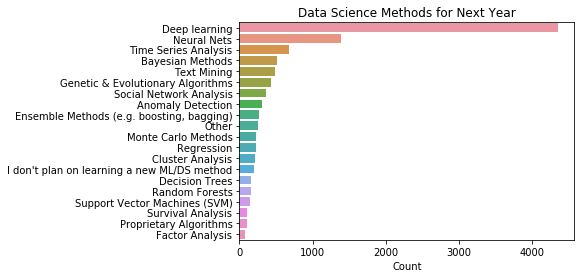

In [ ]:
ml_method_data = mcq['MLMethodNextYearSelect'].value_counts().head(20)
sb.barplot(y=ml_method_data.index, x=ml_method_data).set_title("Data Science Methods for Next Year")
plt.xlabel('Count');

* **Deep Learning, Neural Nets, Times Series Analysis, Baysean Methods** will be popular 
* Actually, **all** these methods are very useful; so learn them all!

### 3. Where Should I Learn Data Science?

In [ ]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str')
s= mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

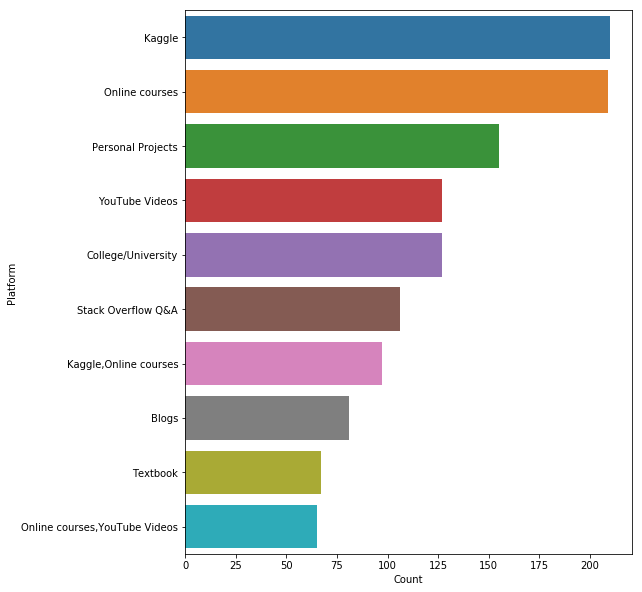

In [ ]:
plt.figure(figsize=(8,10))
data = s[s != 'nan'].value_counts().head(10)
sb.barplot(y=data.index, x=data)
plt.xlabel('Count')
plt.ylabel('Platform');

* People recommended Kaggle the most
* However, this survey was hosted in Kaggle; so the result might be biased

### 4. Do I Need a 'High-Performance' Computer to Study Data Science?

In [ ]:
qc = questions.loc[questions['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [ ]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [ ]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].head()

2                                Basic laptop (Macbook)
7     Basic laptop (Macbook),Gaming Laptop (Laptop +...
10    Laptop or Workstation and local IT supported s...
12       Basic laptop (Macbook),Traditional Workstation
18                               Basic laptop (Macbook)
Name: HardwarePersonalProjectsSelect, dtype: object

In [ ]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))
a = mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']), axis=1).stack().reset_index(level=1, drop=True)
a.name = 'Hardware'

In [ ]:
a = a[a != 'nan']
pd.DataFrame(a.value_counts())

,Hardware
Basic laptop (Macbook),2246
Azure,669
GCE ...),669
Laptop + Cloud service (AWS,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


* Macbook users, labto + Cloud service, Azure, and gaming labtop with capable GPU!

### 5. How Many Hours Should I Study?

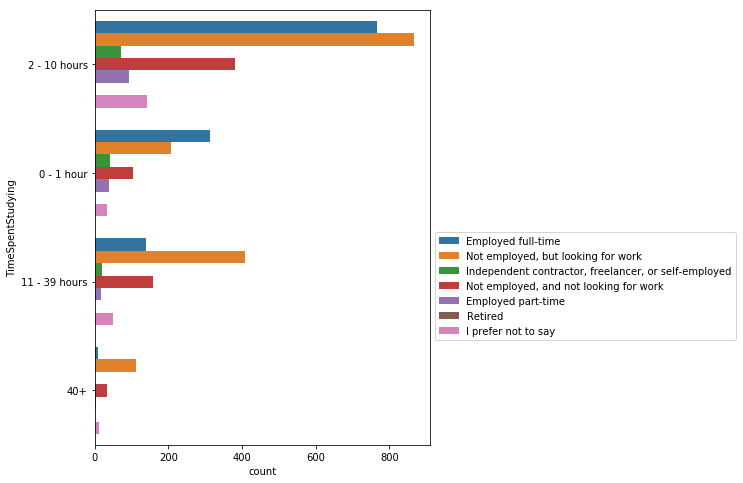

In [ ]:
plt.figure(figsize=(6,8))
sb.countplot(y='TimeSpentStudying', data=mcq, hue='EmploymentStatus').legend(loc='best', bbox_to_anchor=(1.0,0.5));

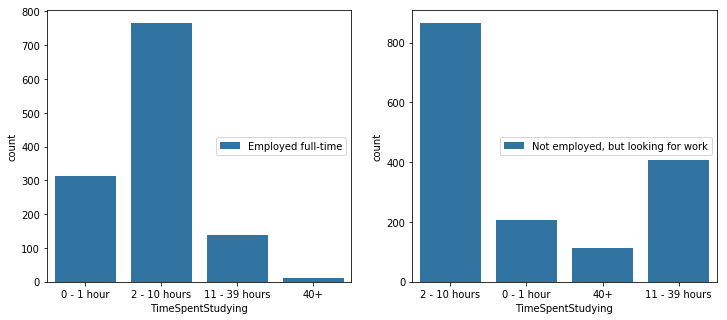

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,5)
full_time = mcq[mcq['EmploymentStatus']=='Employed full-time']
sb.countplot(x='TimeSpentStudying', data=full_time, hue='EmploymentStatus', ax=ax1).legend(loc='center right', bbox_to_anchor=(1,0.5))

job_seekers = mcq[mcq['EmploymentStatus']=='Not employed, but looking for work']
sb.countplot(x='TimeSpentStudying', data=job_seekers, hue='EmploymentStatus', ax=ax2).legend(loc='center right', bbox_to_anchor=(1,0.5));

* Full time workers (780+) mostly study for 2-10 hours a day
* Most of job seekers (850+) study 2-10 hours
* The proportion of job seekers (400+) studying **11-39 hours** is much higher than full-time workers, only 150+  studying 11-39 hours

### 6. What Blogs, Podcasts, Classes Are Recommended?

In [ ]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [ ]:
blog = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']), axis=1).stack().reset_index(level=1, drop=True)
blog.name = 'platforms'
blog.head()

In [ ]:
blog = blog[blog != 'nan'].value_counts()

In [ ]:
plt.figure(figsize=(8,10))
plt.title('Most Popular Blogs, Podcasts and Newsletters')
plt.xlabel('Count')
plt.ylabel('Contents')
sb.barplot(y=data.index, x=data);

In [ ]:
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head(10)

In [ ]:
course = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
course.name = 'course'

In [ ]:
course = course[course != 'nan'].value_counts()
course

In [ ]:
plt.title("Most Popular Courses")
sb.barplot(x = course.index, y=course)
plt.ylabel('Count');

### 7. How Much Do Data Scientists Make?

In [ ]:
mcq[mcq['CompensationAmount'].notnull()]

In [ ]:
# I can check some amounts are in xxx,xxx or xxx-xx format. I will change this
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace(',', '')
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace('-', '')

In [ ]:
# Import conversionRates.csv to calculate the currency rates
rates = pd.read_csv('conversionRates.csv')
rates.head(10)

In [ ]:
# Delete the unnecessary first column
rates.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
salary = mcq[['CompensationAmount', 'CompensationCurrency', 'Country', 'GenderSelect', 'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates, left_on = 'CompensationCurrency', right_on='originCountry', how='left')
salary.head()

In [ ]:
# add 'Salary' column to calculate the actual salary after conversion rate
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

In [ ]:
print('The minimum salary in USD is $', salary['Salary'].dropna().astype(int).min())
print('The maximum salary in USD is $', salary['Salary'].dropna().astype(int).max())
print('The average salary in USD is $', salary['Salary'].dropna().astype(int).median())

* The maximum salary is fake data for sure, since it's higher than some countries GDP! 
* We will need to search for the real maximum salary in the market and make it as the limit
* Or, we can set limit as $ 500,000 first to see how graph looks like

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Salary Distribution of DS-ML Employees (in USD)')
plt.ylabel('Proportion')
salary = salary[salary['Salary'] < 500000]
sb.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle=':');

* The mean salary is $53812 

In [ ]:
salary_country = salary.groupby('Country')['Salary'].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(10,13))
plt.title('Average Salary of Data Scientist Around the World')
sb.barplot('Salary', salary_country.index, data=salary_country)
plt.axvline(salary['Salary'].median(), linestyle=(':'));

In [ ]:
salary_country.head()

* Data Scientists and Machine Learning Scientists in the United States make \\$115,689 on average, which is more than twice of national mean $53,812

In [ ]:
plt.subplots(figsize=(8,6))
sb.boxplot(y='GenderSelect', x='Salary', data=salary);

* There's no distinct gender salary gap. However, for those who make more than \\$350,000, are all male scientists.

### 8. Where Can I Get Data From? 

In [ ]:
mcq['PublicDatasetsSelect'].head()

In [ ]:
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))
mcq['PublicDatasetsSelect'].head()

In [ ]:
sources = mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']), axis=1).stack().reset_index(level=1, drop=True)
sources.name = 'Sources'

In [ ]:
sources = sources[sources !='nan'].value_counts()

In [ ]:
pd.DataFrame(sources)

In [ ]:
plt.title("Most Popular Dataset Sources")
sb.barplot(y=sources.index, x=sources)
plt.xlabel("Count");

* The most popular dataset source is Socrata, Kaggle, data.world, and google search followed

### 9. How Do Data Scientist Spend Most of Their Time at Work?

In [ ]:
time_features = [x for x in mcq.columns if x.find('Time') !=-1][4:10]
time_features

In [ ]:
t = {}
for feature in time_features:
    t[feature[len('Time'):]] = mcq[feature].mean()
t=pd.Series(t)
t

In [ ]:
plt.pie(t, labels=t.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Percentage of Time Spent on Each Indivisual");

* DS spend 37% of their time for **data gathering**. They also spend a lot of time to build models, create visualizations, and find insights.

### 10. What job skill is most important?

In [ ]:
job_questions = [x for x in mcq.columns if x.find('JobSkillImportance') != -1 and 
                x.find('JobSkillImportanceOther')== -1]
job_questions

In [ ]:
# Create dictionary
job = {}
for question in job_questions:
    a = mcq[question].value_counts()
    #print(a)
    #print(a.sum())
    a = a/a.sum()   #calculate proportion
    job[question[len('JobSkillImportance'):]] = a
job

In [ ]:
job = pd.DataFrame(job).transpose()
job

In [ ]:
# Create heatmap
plt.figure(figsize=(10,8))
plt.title('Important Skills in DS Careers')
sb.heatmap(job.sort_values('Necessary', ascending = False), annot=True);

In [ ]:
job.plot(kind='bar', figsize=(15,10), title ='Important Skills in DS Careers')
plt.xlabel("Skill")
plt.ylabel("Proportion");

* Python, statistics knowledge, skills in visualization, SQL, and R are very necessary
* MOOC, KaggleRanking, EnterpriseTools, Degree are nice to have (to find a job or develop careers)

#### References: 

- https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html
- https://seaborn.pydata.org/tutorial/distributions.html
- https://matplotlib.org/3.1.0/gallery/pie_and_polar_charts/pie_features.html
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://matplotlib.org/3.1.0/api/legend_api.html